In [90]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df = pd.read_csv("data.csv", low_memory = False)

In [92]:
df.head()

,zpid,id,providerListingId,imgSrc,hasImage,detailUrl,statusType,statusText,countryCurrency,price,...,datePriceChanged,rentZestimate,priceReduction,isPreforclosureAuction,taxAssessedValue,lotAreaValue,lotAreaUnit,priceReductionStr,lotAreaRaw,priceReductionRatio
0,17319475,17319475,NaN,https://photos.zillowstatic.com/fp/0e49d7018ab...,True,https://www.zillow.com/homedetails/15807-Ceres...,FOR_SALE,House for sale,$,"$449,000",...,NaN,2499.0,NaN,False,113023.0,0.2754820936639118,acres,0.0,12000.0,0.0
1,17315944,17315944,NaN,https://photos.zillowstatic.com/fp/0a54f45b1c5...,True,https://www.zillow.com/homedetails/6648-Logan-...,FOR_SALE,House for sale,$,"$565,000",...,NaN,3200.0,NaN,False,259935.0,6620.0,sqft,0.0,6620.0,0.0
2,59194876,59194876,NaN,https://photos.zillowstatic.com/fp/9e05ed151ed...,True,https://www.zillow.com/homedetails/9508-Marcon...,FOR_SALE,House for sale,$,"$520,000",...,NaN,2694.0,NaN,False,257453.0,8663.0,sqft,0.0,8663.0,0.0
3,94691896,94691896,NaN,https://photos.zillowstatic.com/fp/568ced22116...,True,https://www.zillow.com/homedetails/17625-Hawth...,FOR_SALE,House for sale,$,"$799,900",...,1647500400000.0,2929.0,NaN,False,346983.0,0.3693985307621671,acres,0.0,16091.0,0.0
4,17338891,17338891,NaN,https://photos.zillowstatic.com/fp/2f5d9b9bed3...,True,https://www.zillow.com/homedetails/16562-Iris-...,FOR_SALE,House for sale,$,"$519,999",...,NaN,2928.0,NaN,False,412227.0,8700.0,sqft,0.0,8700.0,0.0


In [93]:
df.shape

(127014, 63)

## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127014 entries, 0 to 127013
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   zpid                        127004 non-null  object
 1   id                          127014 non-null  object
 2   providerListingId           13182 non-null   object
 3   imgSrc                      127004 non-null  object
 4   hasImage                    125360 non-null  object
 5   detailUrl                   127013 non-null  object
 6   statusType                  127012 non-null  object
 7   statusText                  127012 non-null  object
 8   countryCurrency             127013 non-null  object
 9   price                       126995 non-null  object
 10  unformattedPrice            126995 non-null  object
 11  address                     127012 non-null  object
 12  addressStreet               127011 non-null  object
 13  addressCity                 1

Check columns with missing values

In [6]:
cutoff = 0.2
col = []

for name in list(df.columns):
    
    if df[name].isna().sum()/df.shape[0] > cutoff:
        col.append(name)

In [7]:
print(len(col), 'columns have over {}% missing values,'.format(cutoff*100))
col

16 columns have over 20.0% missing values,


['providerListingId',
 'badgeInfo',
 'zestimate',
 'info2String',
 'brokerName',
 'availabilityDate',
 'info3String',
 'hasOpenHouse',
 'openHouseStartDate',
 'openHouseEndDate',
 'openHouseDescription',
 'builderName',
 'datePriceChanged',
 'rentZestimate',
 'priceReduction',
 'taxAssessedValue']

Because the above columns have too many missing values, it wouldn't make sense to impute missing values for these columns. Therefore, we will drop these columns.

In [8]:
df.drop(columns = col, inplace = True)

It wouldn't make sense to include ids and urls in our models, so, we decided to drop zpid, id, imgSrc and detailUrl. 

In [9]:
df.drop(columns = ['zpid', 'id', 'imgSrc', 'detailUrl'], inplace = True)

In [11]:
df.groupby('countryCurrency').count()

,hasImage,statusType,statusText,price,unformattedPrice,address,addressStreet,addressCity,addressState,addressZipcode,...,extractionDate,homeType,daysOnZillow,isFeatured,isPreforclosureAuction,lotAreaValue,lotAreaUnit,priceReductionStr,lotAreaRaw,priceReductionRatio
countryCurrency,,,,,,,,,,,,,,,,,,,,,
$,123994,125544,125544,125526,125526,125544,125543,125544,125544,125543,...,125304,124129,124129,124129,124129,101110,101110,122714,122714,122696
0.0,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"2625 Paul Quinn Rd #A, Houston, TX 77091",1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,1,1,1,0,0,0
C$,1362,1466,1466,1466,1466,1466,1466,1466,1466,1466,...,1466,1466,1466,1466,1466,566,566,1466,1466,1466
countryCurrency,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


Because the majority of house prices are denoted in dollars, we will only keep rows that are in $. Moreover, columns such as 'countryCurrency', 'price' and 'unformattedPrice' contain duplicate information. We will drop 'countryCurrency' and 'price'.

In [12]:
df = df[df['countryCurrency'] == '$']

In [13]:
df.drop(columns = ['countryCurrency', 'price'], inplace = True)

The variable "variableData" and "hdpData" contain information in a dictionary, so we will take a closer look at these two columns and extract information we need. 

In [14]:
df['variableData']

0           {'type': 'DAYS_ON', 'text': '7 days on Zillow'}
1          {'type': 'DAYS_ON', 'text': '10 days on Zillow'}
2         {'type': 'OPEN_HOUSE', 'text': 'Open: Fri. 1-5...
3         {'type': 'DAYS_ON', 'text': '127 days on Zillow'}
4           {'type': 'DAYS_ON', 'text': '8 days on Zillow'}
                                ...                        
127009    {'type': 'DAYS_ON', 'text': '219 days on Zillow'}
127010    {'type': 'DAYS_ON', 'text': '219 days on Zillow'}
127011     {'type': 'DAYS_ON', 'text': '33 days on Zillow'}
127012     {'type': 'DAYS_ON', 'text': '20 days on Zillow'}
127013    {'type': 'DAYS_ON', 'text': '194 days on Zillow'}
Name: variableData, Length: 125544, dtype: object

In [15]:
df['daysOnZillow'].value_counts()

-1      119111
-1.0      5018
Name: daysOnZillow, dtype: int64

In [16]:
df.reset_index(inplace = True)

The 'variableData' column contains information about how long this property has been listed on Zillow, which is similar to another column 'daysOnZillow'. However, the 'daysOnZillow' column in the original dataset contains only 1, which is meaningless to our analysis. We decided to drop the 'daysOnZillow' column. 

The 'variableData' column also contains the open house information. We want to look at the distribution of each category, then decide whether to keep this column.

In [17]:
df['variableData'].fillna('{"type": \'None\'}', inplace = True)

In [18]:
df['variableData'].apply(lambda x: json.loads(x.replace("'", '"').replace('False', 'false')
                                              .replace('"s', "'s").replace('"co', "'co"))['type']).value_counts()

DAYS_ON              68476
OPEN_HOUSE           16808
PRICE_REDUCTION      14357
None                 12310
3D_HOME               7103
TIME_ON_INFO          4109
VIDEO_WALKTHROUGH     1953
MARKET_UPDATE          359
PRICE_CHANGE            69
Name: variableData, dtype: int64

Only 68476 rows contain information relating to 'daysOnZillow', therefore we could just this column.

In [19]:
df['hdpData'][0]

'{\'homeInfo\': {\'zpid\': \'17319475\', \'streetAddress\': \'15807 Ceres Ave\', \'zipcode\': \'92335\', \'city\': \'Fontana\', \'state\': \'CA\', \'latitude\': \'34.09275\', \'longitude\': \'-117.46006\', \'price\': \'449000\', \'bathrooms\': \'1\', \'bedrooms\': \'3\', \'livingArea\': \'1298\', \'homeType\': \'SINGLE_FAMILY\', \'homeStatus\': \'FOR_SALE\', \'daysOnZillow\': \'-1\', \'isFeatured\': \'False\', \'shouldHighlight\': \'False\', \'zestimate\': \'457100\', \'rentZestimate\': \'2499\', \'listing_sub_type\': "{\'is_FSBA\': True}", \'isUnmappable\': \'False\', \'isPreforeclosureAuction\': \'False\', \'homeStatusForHDP\': \'FOR_SALE\', \'priceForHDP\': \'449000\', \'isNonOwnerOccupied\': \'True\', \'isPremierBuilder\': \'False\', \'isZillowOwned\': \'False\', \'currency\': \'USD\', \'country\': \'USA\', \'taxAssessedValue\': \'113023\', \'lotAreaValue\': \'0.27548209366391185\', \'lotAreaUnit\': \'acres\'}}'

Column 'hdpData' contains information already exist, therefore, we decided to drop this column.

In [20]:
df.drop(columns = ['daysOnZillow', 'variableData', 'hdpData'], inplace = True)

Moreover, a variable with only one unique value will be meaningless to our analysis. Therefore, we will drop these columns. 

In [21]:
col = []
for i in list(df.columns):
    
    if len(df[i].unique()) == 1:
        col.append(i)

In [22]:
print(len(col), 'columns have only one unique value.')
col

9 columns have only one unique value.


['statusType',
 'isSaved',
 'isUserClaimingOwner',
 'isUserConfirmedClaim',
 'shouldShowZestimateAsPrice',
 'isHomeRec',
 'isFeaturedListing',
 'list',
 'relaxed']

In [23]:
df.drop(columns = col, inplace = True)

Some columns contain 'nan', which also counts as a unique value, thus columns with only one ’non-nan‘ value are not filtered out by the above step. We will take a closer look at these columns, then decide whether to drop these columns. 

In [24]:
for i in list(df.columns):
    
    if len(df[i].value_counts()) == 1:
        print(i)

hasImage
isFeatured
isPreforclosureAuction


In [25]:
df['hasImage'].unique()

array(['True', nan], dtype=object)

In [26]:
df['hasImage'].value_counts()

True    123994
Name: hasImage, dtype: int64

In [27]:
df['isFeatured'].unique()

array(['False', nan], dtype=object)

In [28]:
df['isFeatured'].value_counts()

False    124129
Name: isFeatured, dtype: int64

In [29]:
df['isPreforclosureAuction'].unique()

array(['False', nan], dtype=object)

In [30]:
df['isPreforclosureAuction'].value_counts()

False    124129
Name: isPreforclosureAuction, dtype: int64

'nan' only occupies a very small percentage of values in these three columns, therefore, we would drop these three columns.

In [31]:
df.drop(columns = ['hasImage', 'isFeatured', 'isPreforclosureAuction'], inplace = True)

'timeOfExtraaction', 'extractionDate' are meaningless, drop them

In [32]:
df.drop(columns = ['timeOfExtraction', 'extractionDate'], inplace = True)

'lotAreaValue', 'lotAreaUnit' and 'lotAreaRaw' contain duplicate information, and we will only keep 'lotAreaRaw' (unit in sqft).

In [33]:
df['lotAreaUnit'].value_counts()

sqft     69409
acres    31701
Name: lotAreaUnit, dtype: int64

In [34]:
df[['lotAreaValue', 'lotAreaUnit', 'lotAreaRaw']].head()

,lotAreaValue,lotAreaUnit,lotAreaRaw
0,0.2754820936639118,acres,12000.0
1,6620.0,sqft,6620.0
2,8663.0,sqft,8663.0
3,0.3693985307621671,acres,16091.0
4,8700.0,sqft,8700.0


In [35]:
df.drop(columns = ['lotAreaValue', 'lotAreaUnit'], inplace = True)

'pgapt' and 'sgapt' contain duplicate information, we would drop 'pgapt'

In [36]:
df['pgapt'].value_counts()

ForSale       124253
ComingSoon      1291
Name: pgapt, dtype: int64

In [37]:
df['sgapt'].value_counts()

For Sale (Broker)    106632
New Construction      16621
Coming Soon            1291
Foreclosure             803
Unknown Listed By        89
For Sale By Owner        59
RecentChange             43
For Sale by Agent         6
Name: sgapt, dtype: int64

In [38]:
df.drop(columns = ['pgapt'], inplace = True)

This dataset has been reduced from 63 to 17 columns.

In [39]:
df = df.iloc[:, 1:]

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125544 entries, 0 to 125543
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   statusText                 125544 non-null  object
 1   unformattedPrice           125526 non-null  object
 2   address                    125544 non-null  object
 3   addressStreet              125543 non-null  object
 4   addressCity                125544 non-null  object
 5   addressState               125544 non-null  object
 6   addressZipcode             125543 non-null  object
 7   isUndisclosedAddress       125544 non-null  object
 8   beds                       111934 non-null  object
 9   baths                      114651 non-null  object
 10  area                       109299 non-null  object
 11  latLong                    125544 non-null  object
 12  isZillowOwned              125544 non-null  object
 13  sgapt                      125544 non-null  

In [41]:
df.head()

,statusText,unformattedPrice,address,addressStreet,addressCity,addressState,addressZipcode,isUndisclosedAddress,beds,baths,...,latLong,isZillowOwned,sgapt,has3DModel,hasVideo,hasAdditionalAttributions,homeType,priceReductionStr,lotAreaRaw,priceReductionRatio
0,House for sale,449000,"15807 Ceres Ave, Fontana, CA 92335",15807 Ceres Ave,Fontana,CA,92335,False,3.0,1.0,...,"{'latitude': 34.09275, 'longitude': -117.46006}",False,For Sale (Broker),False,False,True,SINGLE_FAMILY,0.0,12000.0,0.0
1,House for sale,565000,"6648 Logan Ave, Fontana, CA 92336",6648 Logan Ave,Fontana,CA,92336,False,4.0,3.0,...,"{'latitude': 34.133167, 'longitude': -117.469734}",False,For Sale (Broker),False,False,True,SINGLE_FAMILY,0.0,6620.0,0.0
2,House for sale,520000,"9508 Marcona Ave, Fontana, CA 92335",9508 Marcona Ave,Fontana,CA,92335,False,4.0,2.0,...,"{'latitude': 34.08103, 'longitude': -117.468796}",False,For Sale (Broker),False,False,True,SINGLE_FAMILY,0.0,8663.0,0.0
3,House for sale,799900,"17625 Hawthorne Ave, Fontana, CA 92335",17625 Hawthorne Ave,Fontana,CA,92335,False,5.0,3.0,...,"{'latitude': 34.081074, 'longitude': -117.41974}",False,For Sale (Broker),False,False,True,SINGLE_FAMILY,0.0,16091.0,0.0
4,House for sale,519999,"16562 Iris Dr, Fontana, CA 92335",16562 Iris Dr,Fontana,CA,92335,False,3.0,2.0,...,"{'latitude': 34.072838, 'longitude': -117.44258}",False,For Sale (Broker),False,False,True,SINGLE_FAMILY,0.0,8700.0,0.0


### Change the data type

numerical columns: 
unformattedPrice, area, priceReductionStr, lotAreaRaw, priceReductionRatio

categorical columns:
statusText, addressZipcode, beds, baths, isUndisclosedAddress, isZillowOwned, sgapt, has3DModel, hasVideo, hasAdditionalAttributions, homeType

In [42]:
numerical = ['unformattedPrice', 'area', 'priceReductionStr', 'lotAreaRaw', 'priceReductionRatio']
df[numerical] = df[numerical].astype(float)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125544 entries, 0 to 125543
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   statusText                 125544 non-null  object 
 1   unformattedPrice           125526 non-null  float64
 2   address                    125544 non-null  object 
 3   addressStreet              125543 non-null  object 
 4   addressCity                125544 non-null  object 
 5   addressState               125544 non-null  object 
 6   addressZipcode             125543 non-null  object 
 7   isUndisclosedAddress       125544 non-null  object 
 8   beds                       111934 non-null  object 
 9   baths                      114651 non-null  object 
 10  area                       109299 non-null  float64
 11  latLong                    125544 non-null  object 
 12  isZillowOwned              125544 non-null  object 
 13  sgapt                      12

### Missing value imputation 

In [44]:
rows = df.shape[0]

for i in list(df.columns):
    
    value_cnt = df[i].count()
    if value_cnt != rows:
        print(i, ': {}'.format(rows - value_cnt), 'values are missing ({:.4f})'.format((rows - value_cnt)/rows))

unformattedPrice : 18 values are missing (0.0001)
addressStreet : 1 values are missing (0.0000)
addressZipcode : 1 values are missing (0.0000)
beds : 13610 values are missing (0.1084)
baths : 10893 values are missing (0.0868)
area : 16245 values are missing (0.1294)
homeType : 1415 values are missing (0.0113)
priceReductionStr : 2830 values are missing (0.0225)
lotAreaRaw : 2830 values are missing (0.0225)
priceReductionRatio : 2848 values are missing (0.0227)


##### 'unformattedPrice'

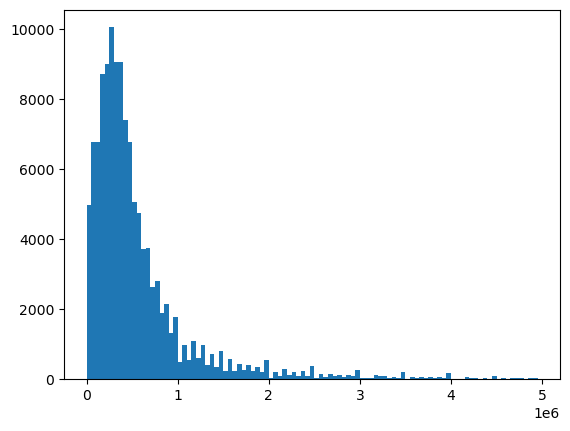

In [45]:
plt.hist(df['unformattedPrice'], bins = range(1, 5000000, 50000))
plt.show()

Because the distribution of this column is rightly skewed, we would use the median value to fill na.

In [46]:
df['unformattedPrice'].fillna(df['unformattedPrice'].median(), inplace = True)

##### 'addressZipcode'

Because there is only one missing value in this column, we can drop it.

In [47]:
df = df[df['addressZipcode'].notnull()]

##### 'beds'

In [48]:
df['beds']

0         3.0
1         4.0
2         4.0
3         5.0
4         3.0
         ... 
125539    NaN
125540    NaN
125541    NaN
125542    NaN
125543    NaN
Name: beds, Length: 125543, dtype: object

In [49]:
df['beds'].astype(float).sort_values(ascending = False)

20632     7800.0
24186     4299.0
23889     2226.0
75919      999.0
111263     190.0
           ...  
125539       NaN
125540       NaN
125541       NaN
125542       NaN
125543       NaN
Name: beds, Length: 125543, dtype: float64

In [50]:
df.iloc[20632]

statusText                                         Multi-family home for sale
unformattedPrice                                                     460000.0
address                                    1942 E Adams St, Phoenix, AZ 85034
addressStreet                                                 1942 E Adams St
addressCity                                                           Phoenix
addressState                                                               AZ
addressZipcode                                                          85034
isUndisclosedAddress                                                    False
beds                                                                   7800.0
baths                                                                     0.0
area                                                                3120000.0
latLong                      {'latitude': 33.449726, 'longitude': -112.03939}
isZillowOwned                                                   

In [51]:
df[df['beds'].astype(float) > 10].head()

,statusText,unformattedPrice,address,addressStreet,addressCity,addressState,addressZipcode,isUndisclosedAddress,beds,baths,...,latLong,isZillowOwned,sgapt,has3DModel,hasVideo,hasAdditionalAttributions,homeType,priceReductionStr,lotAreaRaw,priceReductionRatio
105,Multi-family home for sale,4248000.0,"8505 Mulberry Ave, Fontana, CA 92335",8505 Mulberry Ave,Fontana,CA,92335,False,32.0,28.0,...,"{'latitude': 34.098747, 'longitude': -117.50564}",False,For Sale (Broker),False,False,True,MULTI_FAMILY,0.0,65775.6,0.0
287,Multi-family home for sale,600000.0,"139 School St, Yonkers, NY 10701",139 School St,Yonkers,NY,10701,False,12.0,6.0,...,"{'latitude': 40.927048, 'longitude': -73.89499}",False,For Sale (Broker),False,False,True,MULTI_FAMILY,0.0,0.0,0.0
474,House for sale,689000.0,"107 Oliver Ave, Yonkers, NY 10701",107 Oliver Ave,Yonkers,NY,10701,False,11.0,3.0,...,"{'latitude': 40.93372, 'longitude': -73.88753}",False,For Sale (Broker),False,False,True,SINGLE_FAMILY,0.0,2487.0,0.0
1383,Multi-family home for sale,169900.0,"562 E 140th St, Cleveland, OH 44110",562 E 140th St,Cleveland,OH,44110,False,12.0,6.0,...,"{'latitude': 41.566185, 'longitude': -81.58558}",False,For Sale (Broker),False,False,True,MULTI_FAMILY,0.0,4791.6,0.0
1639,Multi-family home for sale,470000.0,"3328 E 139th St, Cleveland, OH 44120",3328 E 139th St,Cleveland,OH,44120,False,14.0,6.0,...,"{'latitude': 41.46846, 'longitude': -81.58647}",False,For Sale (Broker),False,False,True,MULTI_FAMILY,0.0,0.0,0.0


In [52]:
df[df['beds'].astype(float) > 10].shape

(295, 21)

295 properties have more than 10 bedrooms, we will drop these rows because they could be viewed as outliers in our dataset. We will only keep properties with <= 10 bedrooms and fill missing values with the mode.

In [53]:
df['beds'].value_counts()

3.0       41278
4.0       27435
2.0       20336
5.0        8421
1.0        6315
          ...  
2226.0        1
51.0          1
7800.0        1
72.0          1
190.0         1
Name: beds, Length: 62, dtype: int64

In [54]:
df['beds'].fillna('3.0', inplace = True)

In [55]:
df = df[df['beds'].astype(float) <= 10]

In [56]:
df['beds'] = df['beds'].str.replace('.0', '')

/var/folders/4s/slgnngk162n5t_ts7hcfx3080000gn/T/ipykernel_36490/2421672986.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['beds'] = df['beds'].str.replace('.0', '')


In [57]:
df['beds'].value_counts()

3    55898
4    28025
2    20699
5     8581
1     6385
6     2688
0     1332
7      740
8      545
9      237
       118
Name: beds, dtype: int64

In [58]:
df = df[df['beds'] != '']

##### 'baths'

In [59]:
df['baths'].astype(float).sort_values(ascending = False)

8698      175.0
91827      51.0
35688      35.0
15765      35.0
120382     30.0
          ...  
125539      NaN
125540      NaN
125541      NaN
125542      NaN
125543      NaN
Name: baths, Length: 125130, dtype: float64

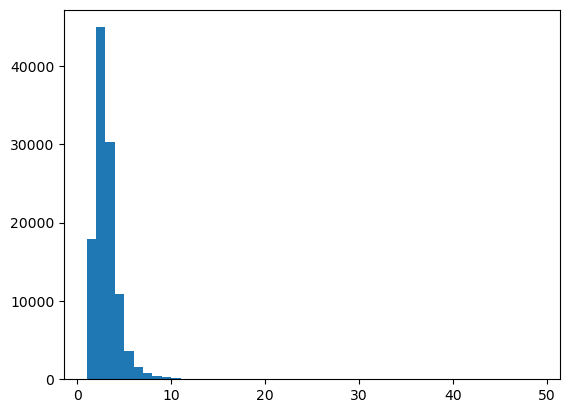

In [60]:
plt.hist(df['baths'].astype(float), bins = range(1, 50, 1))
plt.show()

In [61]:
df['baths'].value_counts().head()

2.0    39559
3.0    26058
1.0    16091
4.0     9186
2       5329
Name: baths, dtype: int64

Because the majority of properties have less than 10 bathrooms, we will first fill in missing values with the mode and then drop rows with more than 10 bathrooms.

In [62]:
df['baths'].fillna('2.0', inplace = True)

In [63]:
df = df[df['baths'].astype(float) <= 10]

In [64]:
df['baths'] = df['baths'].str.replace('.0', '')

/var/folders/4s/slgnngk162n5t_ts7hcfx3080000gn/T/ipykernel_36490/1839513713.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['baths'] = df['baths'].str.replace('.0', '')


In [65]:
df['baths'].value_counts()

2       55768
3       30263
1       17833
4       10897
5        3631
0        3332
6        1628
7         795
8         409
9         258
          111
2.5        12
4.1        10
2.1         7
3.1         3
1.5         3
2.2         2
3.5         1
3.3         1
1.75        1
4.5         1
5.2         1
Name: baths, dtype: int64

We will keep only properties with full bathrooms.

In [66]:
df = df[df['baths'].apply(lambda x: len(x) == 1)]

In [67]:
df['baths'].value_counts()

2    55768
3    30263
1    17833
4    10897
5     3631
0     3332
6     1628
7      795
8      409
9      258
Name: baths, dtype: int64

##### 'area'

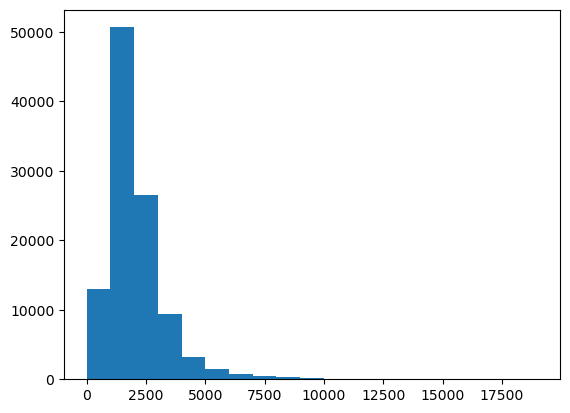

In [68]:
plt.hist(df['area'], bins = range(1, 20000, 1000))
plt.show()

Because the distribution is rightly skewed, we will fill in the missing values with the median.

In [69]:
df['area'].fillna(df['area'].median(), inplace = True)

##### 'homeType'

In [70]:
df['homeType'].value_counts()

SINGLE_FAMILY    76141
CONDO            19583
LOT              12383
TOWNHOUSE         7145
MULTI_FAMILY      6155
MANUFACTURED      1693
APARTMENT          303
Name: homeType, dtype: int64

In [71]:
df['homeType'].fillna('SINGLE_FAMILY', inplace = True)

##### 'lotAreaRaw'

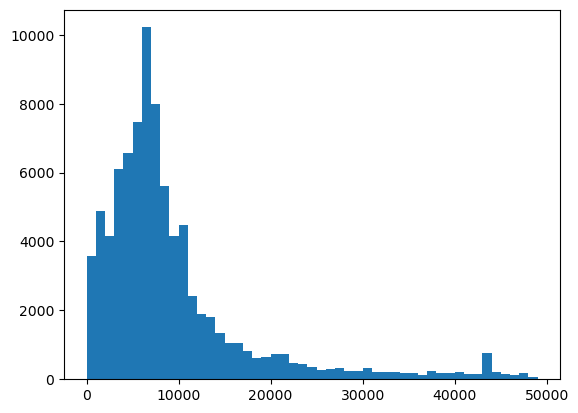

In [72]:
plt.hist(df['lotAreaRaw'], bins = range(1, 50000, 1000))
plt.show()

In [73]:
df['lotAreaRaw'].fillna(df['lotAreaRaw'].median(), inplace = True)

In [74]:
df.dropna(inplace = True)
df.reset_index(inplace = True)
df = df.iloc[1:, ]

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121976 entries, 1 to 121976
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   index                      121976 non-null  int64  
 1   statusText                 121976 non-null  object 
 2   unformattedPrice           121976 non-null  float64
 3   address                    121976 non-null  object 
 4   addressStreet              121976 non-null  object 
 5   addressCity                121976 non-null  object 
 6   addressState               121976 non-null  object 
 7   addressZipcode             121976 non-null  object 
 8   isUndisclosedAddress       121976 non-null  object 
 9   beds                       121976 non-null  object 
 10  baths                      121976 non-null  object 
 11  area                       121976 non-null  float64
 12  latLong                    121976 non-null  object 
 13  isZillowOwned              12

## Feature Engineering 

We can extract latitude and longitude from the 'latLong' column.

In [76]:
df[df['latLong'] == '{}']

,index,statusText,unformattedPrice,address,addressStreet,addressCity,addressState,addressZipcode,isUndisclosedAddress,beds,...,latLong,isZillowOwned,sgapt,has3DModel,hasVideo,hasAdditionalAttributions,homeType,priceReductionStr,lotAreaRaw,priceReductionRatio
24,24,Home for sale,100000.0,"7908 Toyak Ave SPACE 10, Fontana, CA 92336",7908 Toyak Ave SPACE 10,Fontana,CA,92336,False,2,...,{},False,For Sale (Broker),False,False,True,MANUFACTURED,0.0,0.0,0.0
83,83,New construction,670490.0,"7255 Rhapsody Ln, Fontana, CA 92336",7255 Rhapsody Ln,Fontana,CA,92336,False,4,...,{},False,New Construction,False,False,True,SINGLE_FAMILY,0.0,2686.0,0.0
101,101,Lot / Land for sale,220000.0,"0 Mountain View Ave, Fontana, CA 92336",0 Mountain View Ave,Fontana,CA,92336,False,3,...,{},False,For Sale (Broker),False,False,True,LOT,0.0,19800.0,0.0
114,115,New construction,794920.0,"15727 Parry Peak Dr, Fontana, CA 92336",15727 Parry Peak Dr,Fontana,CA,92336,False,5,...,{},False,New Construction,False,False,True,SINGLE_FAMILY,0.0,5250.0,0.0
138,139,New construction,688432.0,"6951 Stonecrop Ln, Fontana, CA 92336",6951 Stonecrop Ln,Fontana,CA,92336,False,3,...,{},False,New Construction,False,False,True,CONDO,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121840,125395,House for sale,489000.0,"178-182 Weequahic Ave, Newark, NJ 07112",178-182 Weequahic Ave,Newark,NJ,7112,False,5,...,{},False,For Sale (Broker),False,False,True,SINGLE_FAMILY,0.0,0.0,0.0
121848,125404,New construction,610000.0,"10 Shaw Ave, Newark, NJ 07112",10 Shaw Ave,Newark,NJ,7112,False,6,...,{},False,New Construction,False,False,True,MULTI_FAMILY,0.0,3300.0,0.0
121906,125468,Multi-family home for sale,330000.0,"542 S 18th St FLOOR 2, Newark, NJ 07103",542 S 18th St FLOOR 2,Newark,NJ,7103,False,6,...,{},False,For Sale (Broker),False,False,True,MULTI_FAMILY,0.0,2613.6,0.0
121934,125497,Multi-family home for sale,605000.0,"302 Clinton Pl #306, Newark, NJ 07112",302 Clinton Pl #306,Newark,NJ,7112,False,9,...,{},False,For Sale (Broker),False,False,True,MULTI_FAMILY,0.0,6969.6,0.0


5225 properties in this dataset do not have latitude and longitude information, we can drop these rows.

In [77]:
df = df[df['latLong'] != '{}']

In [78]:
df['lat'] = df['latLong'].apply(lambda x: json.loads(x.replace("'", '"'))['latitude'])
df['long'] = df['latLong'].apply(lambda x: json.loads(x.replace("'", '"'))['longitude'])
df.drop(columns = 'latLong', inplace = True)

In [79]:
df.head()

,index,statusText,unformattedPrice,address,addressStreet,addressCity,addressState,addressZipcode,isUndisclosedAddress,beds,...,sgapt,has3DModel,hasVideo,hasAdditionalAttributions,homeType,priceReductionStr,lotAreaRaw,priceReductionRatio,lat,long
1,1,House for sale,565000.0,"6648 Logan Ave, Fontana, CA 92336",6648 Logan Ave,Fontana,CA,92336,False,4,...,For Sale (Broker),False,False,True,SINGLE_FAMILY,0.0,6620.0,0.0,34.133167,-117.469734
2,2,House for sale,520000.0,"9508 Marcona Ave, Fontana, CA 92335",9508 Marcona Ave,Fontana,CA,92335,False,4,...,For Sale (Broker),False,False,True,SINGLE_FAMILY,0.0,8663.0,0.0,34.081030,-117.468796
3,3,House for sale,799900.0,"17625 Hawthorne Ave, Fontana, CA 92335",17625 Hawthorne Ave,Fontana,CA,92335,False,5,...,For Sale (Broker),False,False,True,SINGLE_FAMILY,0.0,16091.0,0.0,34.081074,-117.419740
4,4,House for sale,519999.0,"16562 Iris Dr, Fontana, CA 92335",16562 Iris Dr,Fontana,CA,92335,False,3,...,For Sale (Broker),False,False,True,SINGLE_FAMILY,0.0,8700.0,0.0,34.072838,-117.442580
5,5,House for sale,580000.0,"9577 Sultana Ave, Fontana, CA 92335",9577 Sultana Ave,Fontana,CA,92335,False,4,...,For Sale (Broker),False,False,True,SINGLE_FAMILY,0.0,7300.0,0.0,34.079777,-117.469215


In [80]:
df = df.iloc[:, 1:]

As many of the variables here are not normally distributed, there are might be some extremely small/large houses that were underrepresented in the dataset. We can find and remove those outliers for better model performance.

In [81]:
df = df[df['unformattedPrice'] > 0]
df = df[df['area'] > 0]

In [82]:
# Function to find outlier bounds in the dataset
def find_outliers(column):
    Q1, Q3 = np.percentile(column, [25, 75])
    iqr = Q3 - Q1
    lower_range = Q1 - 1.5 * iqr
    upper_range = Q3 + 1.5 * iqr
    return lower_range, upper_range

In [83]:
# determine bounds for price and area
pricelower, priceupper = find_outliers(df.unformattedPrice)
arealower, areaupper = find_outliers(df.area)

In [84]:
# drop data outside of lower and upper range
df.drop(df[(df.unformattedPrice > priceupper) | (df.unformattedPrice <= 1000)].index, inplace=True)
df.drop(df[(df.area > areaupper) | (df.area <= 100)].index, inplace=True)

In [85]:
df.head()

,statusText,unformattedPrice,address,addressStreet,addressCity,addressState,addressZipcode,isUndisclosedAddress,beds,baths,...,sgapt,has3DModel,hasVideo,hasAdditionalAttributions,homeType,priceReductionStr,lotAreaRaw,priceReductionRatio,lat,long
1,House for sale,565000.0,"6648 Logan Ave, Fontana, CA 92336",6648 Logan Ave,Fontana,CA,92336,False,4,3,...,For Sale (Broker),False,False,True,SINGLE_FAMILY,0.0,6620.0,0.0,34.133167,-117.469734
2,House for sale,520000.0,"9508 Marcona Ave, Fontana, CA 92335",9508 Marcona Ave,Fontana,CA,92335,False,4,2,...,For Sale (Broker),False,False,True,SINGLE_FAMILY,0.0,8663.0,0.0,34.081030,-117.468796
3,House for sale,799900.0,"17625 Hawthorne Ave, Fontana, CA 92335",17625 Hawthorne Ave,Fontana,CA,92335,False,5,3,...,For Sale (Broker),False,False,True,SINGLE_FAMILY,0.0,16091.0,0.0,34.081074,-117.419740
4,House for sale,519999.0,"16562 Iris Dr, Fontana, CA 92335",16562 Iris Dr,Fontana,CA,92335,False,3,2,...,For Sale (Broker),False,False,True,SINGLE_FAMILY,0.0,8700.0,0.0,34.072838,-117.442580
5,House for sale,580000.0,"9577 Sultana Ave, Fontana, CA 92335",9577 Sultana Ave,Fontana,CA,92335,False,4,2,...,For Sale (Broker),False,False,True,SINGLE_FAMILY,0.0,7300.0,0.0,34.079777,-117.469215


In [86]:
col = []
for i in list(df.columns):
    
    if len(df[i].unique()) == 1:
        col.append(i)

In [87]:
print(col)

['isUndisclosedAddress']


In [88]:
df.drop(columns = col, inplace = True)

In [89]:
df.to_csv('cleaned_data.csv', index = False)